# SVM Introduction

## SVM implementation

SVMs are based on a convex quadratic optimization problem (dual formulation). Although there are algorithms specific to SVMs (Sequential Minimal Optimization,...), one must keep in mind that solving such a problem has a complexity at least in $\mathcal{O}(n^2)$ where $n$ is the number of examples in the training dataset. 

Nevertheless, in the linear case, there are implementations of stochastic gradient descent (as for logistic regression and neural networks), which, if they converge less well, have a complexity in $\mathcal{O}(n)$ and thus allow to treat large problems.

The main difficulty of SVM is the adjustment of regularization parameter (often called $C$) and in the nonlinear case, the kernel adjustment (the most simple kernel, the exponential one, has a parameter $\gamma$).

To adjust them, we proceed as for other Machine Learning algorithms, we will test different values of these hyperparameters. For each of these values, we will estimate the generalization error (via cross-validation). It is unfortunately well known that SVMs (especially nonlinear ones) only learn well for a restricted range of hyperparameters values, so it is important to search efficiently for the best hyperparameters. It is common to sample the values of $C$ and the kernel parameters very broadly.


Thus we need efficient implementations of SVMs, some of which are:
- `libsvm`, C++ library wrapped in Python in `sklearn` in `svm` module, for non linear SVM
- `liblinear`, linked to former library for linear SVM and logistic regression,  implements specific optimization methods for both, wrapped in Python in `LinearSVC` in `sklearn`
- `SGDClassifier` which comes from an implementation of Stochastic Gradient Descent for SVM by L. Bottou `svmsgd`

## Introduction to classification with `scikit-learn`

In [1]:
from sklearn import svm, metrics, datasets

In [2]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We use the course example: iris dataset

In [3]:
iris = sns.load_dataset('iris')

Let's have a look on data description

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


There are 4 input data and 1 class

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Pairplot

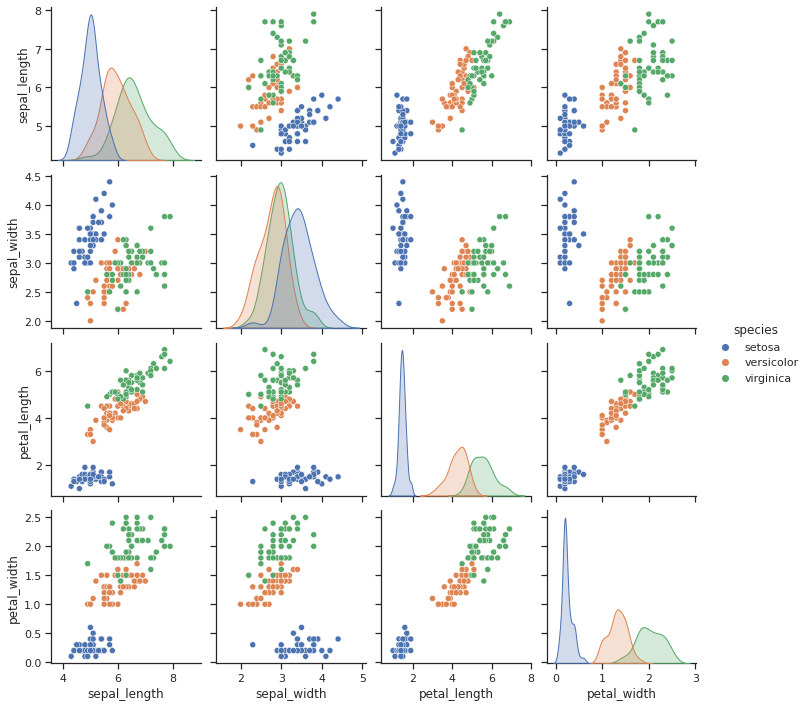

In [7]:
sns.pairplot(iris, hue="species")

Plot with seaborn

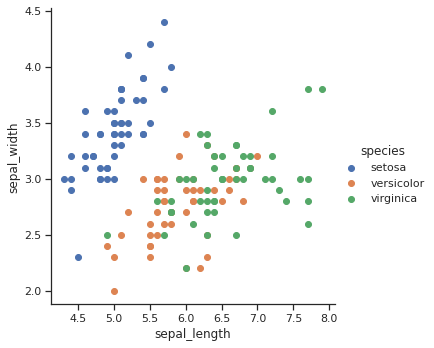

In [8]:
sns.FacetGrid(iris, hue="species",height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

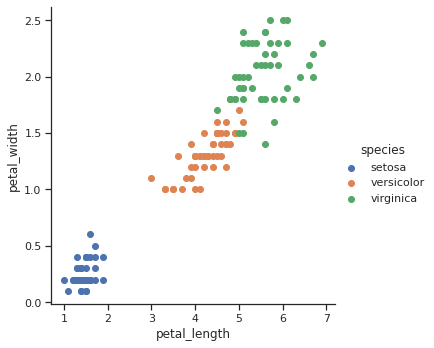

In [9]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()

We start by splitting the data into a learning base and a test base. NB: the test base is to be forgotten during the whole construction of the model, it will only be called at the very end, once the final model is trained. These data correspond to what our predictive model in production would have as inputs.

In [10]:
from sklearn.model_selection import train_test_split

This function is quite simple, you can specify either a number or a percent of data

In [11]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [12]:
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
X_train,X_test, y_train, y_test=train_test_split(x,y,test_size=0.50)

Here we consider a very high cost for a bad classification (C) and build a linear SVM

In [13]:
svm_iris=svm.SVC(kernel='linear',C=1000000000)

In [14]:
svm_iris.fit(X_train,y_train)

SVC(C=1000000000, kernel='linear')

Now we evaluate the prediction performance on the test dataset

In [15]:
y_pred=svm_iris.predict(X_test)

We can have a look at confusion matrix

In [16]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[27  0  0]
 [ 0 21  1]
 [ 0  4 22]]


And also print (and plot) the support vectors

In [17]:
svm_iris.support_vectors_

array([[5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5. , 2.3, 3.3, 1. ],
       [6. , 3.4, 4.5, 1.6],
       [6. , 2.7, 5.1, 1.6],
       [6.3, 2.7, 4.9, 1.8],
       [4.9, 2.5, 4.5, 1.7],
       [6.5, 3. , 5.5, 1.8]])

**Exercise** : Try other kernels and other C values

## Regression intrduction with `scikit-learn`

For this introduction to SVR, we make use of a classic dataset: `Pima Diabetes Dataset`

In [18]:
from sklearn import datasets
diab = datasets.load_diabetes()

`scikit-learn` comes with some classic data sets. This one comes from a well-known study on the occurrence of diabetes among Indian women.

In [19]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [20]:
X = diab.data
y = diab.target

The train/test splitting

In [21]:
from sklearn.model_selection import train_test_split

We choose to keep $20 \%$ of points in the test dataset.

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [23]:
X_train.shape

(353, 10)

In [24]:
from sklearn.model_selection import GridSearchCV

`GridSearchCV` enables to perform cross-validation without coding it (even though it's not complicated)

We start by the initialization of a SVR instance

In [25]:
from sklearn.svm import SVR

In [26]:
clf_svm = SVR()

It is a SVM regressor object with lots of attributs and methods

In [27]:
clf_svm.kernel

'rbf'

In [28]:
clf_svm.C

1.0

In [29]:
clf_svm.gamma

'scale'

In [30]:
clf_svm.epsilon

0.1

We now have an object that enables to perform a regression based on RBF kernel SVM with regularization parameters and kernel parameters (automatic setting method)

## Training

The training is done with 'fit'

In [31]:
clf_svm.fit(X_train, Y_train)

SVR()

We can estimate the score on training data

In [32]:
clf_svm.score(X_train, Y_train)

0.19153653969143003

In [33]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


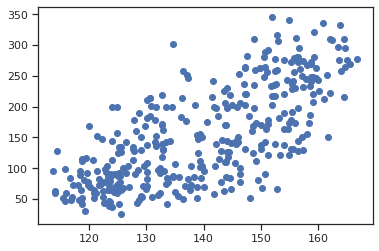

In [34]:
plt.plot(clf_svm.predict(X_train), Y_train,'o')

The regression is poor: it gives almost the same value for each input data. The best solution is to explore the hyperparameters space and perform a cross validation estimation of generalization error for each combination.

In [35]:
gammas = np.logspace(0.5,1,5)
Cs     = np.logspace(1.7,2.5,5)
epsilons = np.logspace(0.2,0.7,5)

param_dict = [{'gamma': gammas, 'C': Cs, 'epsilon': epsilons}]
cv_svr = GridSearchCV(clf_svm, param_dict, cv = 5, refit=True)

In [36]:
cv_svr.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': array([ 50.11872336,  79.43282347, 125.89254118, 199.5262315 ,
       316.22776602]),
                          'epsilon': array([1.58489319, 2.11348904, 2.81838293, 3.75837404, 5.01187234]),
                          'gamma': array([ 3.16227766,  4.21696503,  5.62341325,  7.49894209, 10.        ])}])

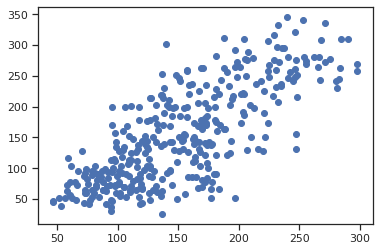

In [37]:
plt.plot(cv_svr.predict(X_train), Y_train,'o')

The regression is quite better

**Exercise 1** : Estimate the generalization error on tests data

**Exercise 2** : Try other kernels

**Exercise 3** : Try linear SVR

**Final Exercise** :  Use crossvalidation to find the best hyperparameters on iris dataset